<a href="https://colab.research.google.com/github/RoccoBellusci/MLPNS_RBellusci/blob/main/deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [3]:
plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["image.interpolation"] = "nearest" # per evitare che non interpoli i pixel
plt.rcParams["image.cmap"] = "gist_gray"

In [4]:
cd /content/drive/MyDrive/MLPNS2023

/content/drive/MyDrive/MLPNS2023


In [5]:
ls

kaggleHiggs/  kaggle.json  kaggleTitanic/  MLPNS2023/


In [6]:
cd /content/drive/MyDrive/MLPNS2023/MLPNS2023

/content/drive/MyDrive/MLPNS2023/MLPNS2023


In [7]:
ls

kaggleTitanic/  spm/  spm-20210427T111354Z-001.zip


In [8]:
ls

kaggleTitanic/  spm/  spm-20210427T111354Z-001.zip


In [9]:
ls

kaggleTitanic/  spm/  spm-20210427T111354Z-001.zip


In [10]:
ls

kaggleTitanic/  spm/  spm-20210427T111354Z-001.zip


In [11]:
#!unzip spm-20210427T111354Z-001.zip commento tanto già ho unzippato il file

In [12]:
data = np.load("spm/train_good_all.npy")

In [13]:
data.shape

(1302, 64, 64)

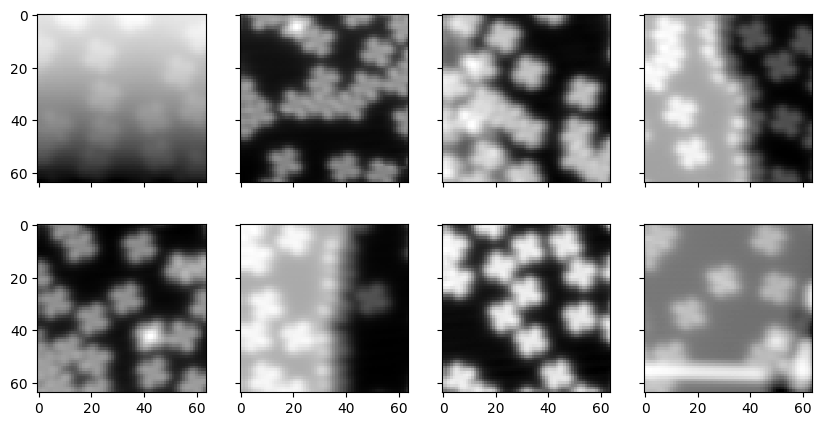

In [14]:
fig, ax = plt.subplots(2, 4, sharex = True, sharey = True, figsize = (10,5))

for ii in range(8):
  ax[ii // 4, ii % 4].imshow(data[ii])

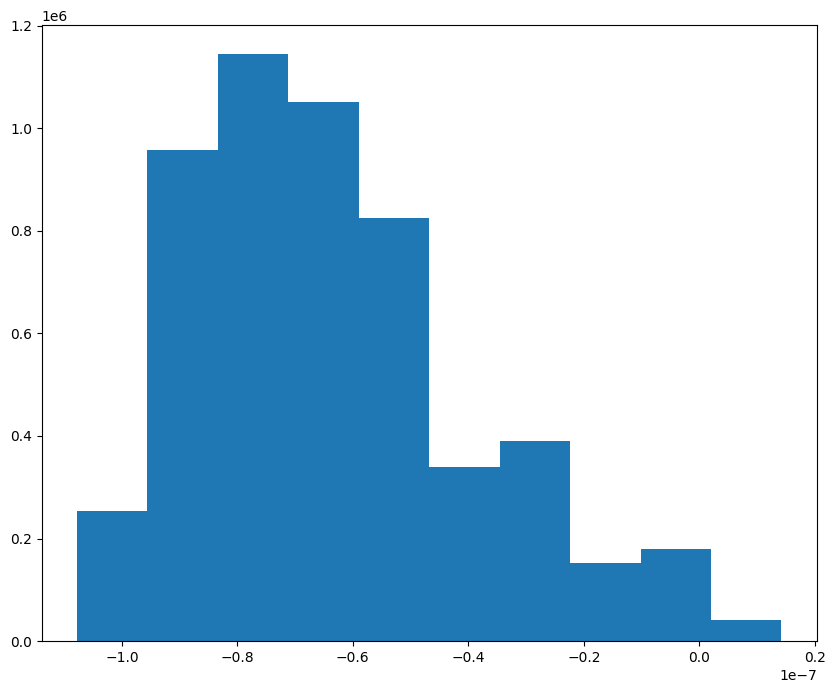

In [15]:
plt.hist(data.flatten());

In [16]:
#norm = ( D - MIN(D)) / RANGE(D)
norm = (data - data.min(axis=(1, 2), keepdims=True)) / (data.max(axis=(1, 2), keepdims=True) - 
                                                        data.min(axis=(1, 2), keepdims=True))

#normalizzo le immagini, ogni immagine sarà in un range 0 e 1

In [17]:
norm.shape

(1302, 64, 64)

In [18]:
norm.min(), norm.max()

(0.0, 1.0)

In [19]:
pos = np.load("spm/spm_struct_pos.npy")
neg = np.load("spm/spm_struct_neg.npy")
 


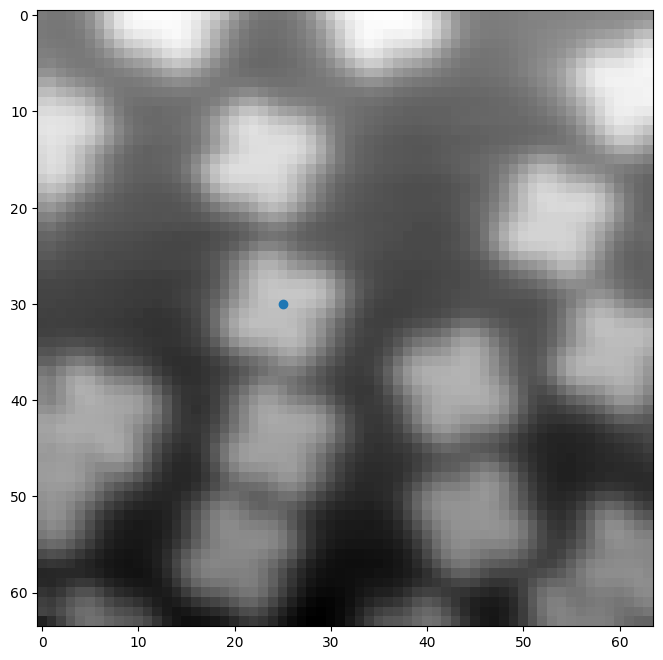

In [20]:
plt.imshow(norm[pos[0][2]])
plt.plot(pos[0][1], pos[0][0],'o')

In [21]:
wid = 10
stmp_pos = []

for ii in range(pos.shape[0]):
  trow, tcol, tind = pos[ii]
  if (trow > wid) & (trow < 64 - wid) & (tcol < 64 - wid) & (tcol > wid):
    stmp_pos.append(norm[tind, trow-wid:trow+wid,  tcol-wid:tcol+wid])

stmp_pos = np.array(stmp_pos)

In [22]:
stmp_pos.shape

(389, 20, 20)

In [23]:
pos.shape[0]

500

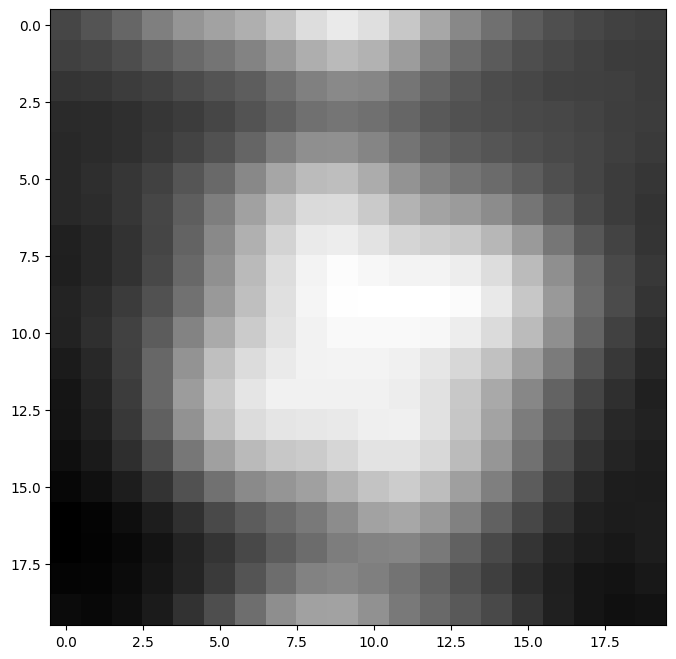

In [24]:
plt.imshow(stmp_pos[0])

In [25]:
wid = 10
stmp_neg = []

for ii in range(pos.shape[0]):
  trow, tcol, tind = neg[ii]
  if (trow > wid) & (trow < 64 - wid) & (tcol < 64 - wid) & (tcol > wid):
    stmp_neg.append(norm[tind, trow-wid:trow+wid,  tcol-wid:tcol+wid])

stmp_neg = np.array(stmp_neg)

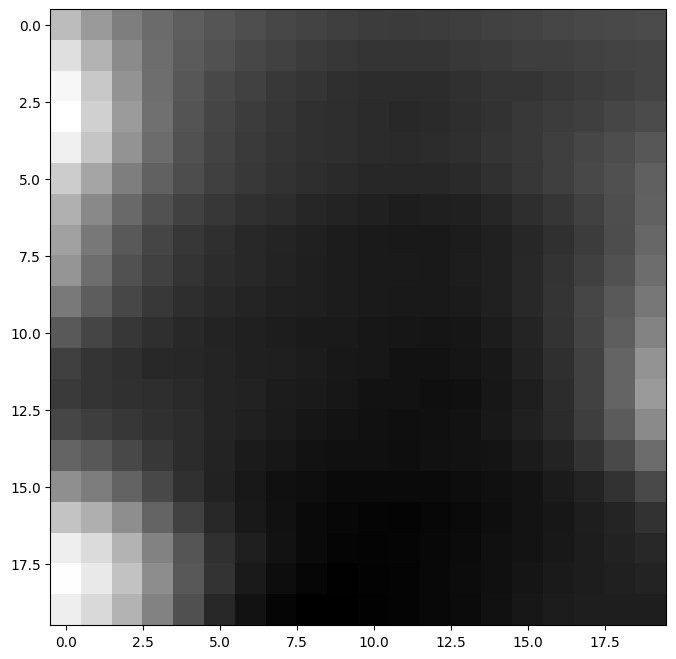

In [26]:
plt.imshow(stmp_neg[0])

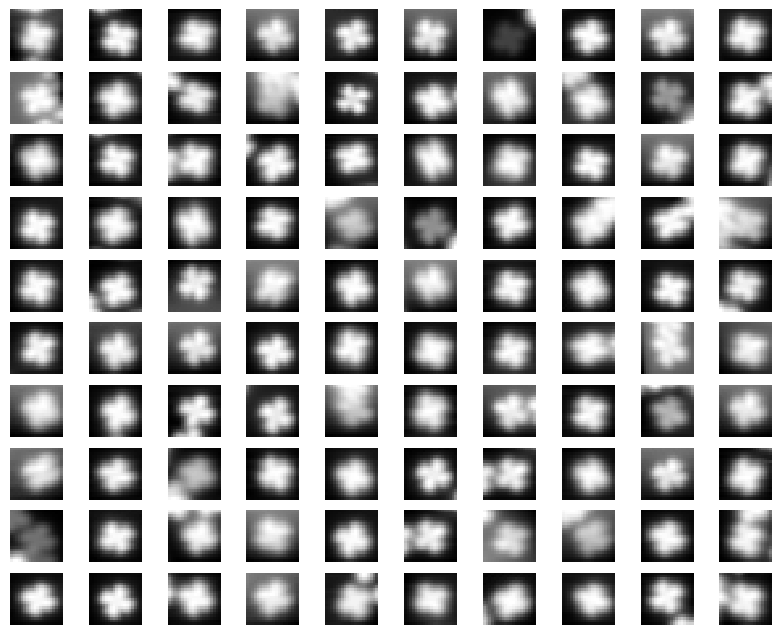

In [27]:
# plot  positive examples
fig, ax = plt.subplots(10, 10)
for ii in range(100):
    ax[ii // 10, ii % 10].imshow(stmp_pos[ii])
    ax[ii // 10, ii % 10].axis("off")

In [28]:
feat = np.concatenate((stmp_neg, stmp_pos), axis = 0)
targ = np.concatenate((np.zeros(stmp_neg.shape[0]), np.ones(stmp_pos.shape[0])))

In [29]:
targ

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [30]:
feat_tr, feat_te, targ_tr, targ_te = train_test_split(feat,targ, random_state = 302, shuffle = True)

feat_tr.shape

(655, 20, 20)

In [31]:
feat_tr = np.expand_dims(feat_tr, axis = 3)
feat_te = np.expand_dims(feat_te, axis = 3)
feat_tr.shape

(655, 20, 20, 1)

# Create a NN



*   conv2d 16 neurons
*   maxpool2d
*   conv2d 32 neuron
* maxpoll2d
* flatten 
*dense 64 neurons
* dense 2 neurons (why??)



In [32]:
layer1 = keras.layers.Conv2D(16, kernel_size=(5, 5), padding="same", 
                             activation="relu", 
                             input_shape=(2 * wid, 2 * wid, 1), #needed in the first layer only
                             kernel_regularizer=keras.regularizers.l2(0.001))

layer2 = keras.layers.MaxPooling2D(pool_size = (2,2)) #padding="same", 
                             #activation="relu", 
                             #kernel_regularizer=keras.regularizers.l2(0.001))

layer3 = keras.layers.Conv2D(32, kernel_size=(5, 5), padding="same", 
                             activation="relu", 
                             input_shape=(2 * wid, 2 * wid, 1), #needed in the first layer only
                             kernel_regularizer=keras.regularizers.l2(0.001))

layer4 = keras.layers.MaxPooling2D(pool_size = (2,2)) 

layer5 = keras.layers.Flatten()

layer6 = keras.layers.Dense(64, activation = "relu")

layer7 = keras.layers.Dense(2, activation = "softmax")

layers = [layer1, layer2, layer3, layer4, layer5, layer6, layer7]
model = keras.Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 20, 20, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 64)                5

In [33]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = "accuracy")

In [34]:
history = model.fit(feat_tr, targ_tr, epochs = 50, batch_size = 50, validation_split = 0.1)

Epoch 1/50
12/12 [==============================] - 12s 39ms/step - loss: 0.6173 - accuracy: 0.6740 - val_loss: 0.4765 - val_accuracy: 0.9242
Epoch 2/50
12/12 [==============================] - 0s 6ms/step - loss: 0.4301 - accuracy: 0.9134 - val_loss: 0.2843 - val_accuracy: 0.9091
Epoch 3/50
12/12 [==============================] - 0s 6ms/step - loss: 0.3052 - accuracy: 0.9032 - val_loss: 0.2882 - val_accuracy: 0.9091
Epoch 4/50
12/12 [==============================] - 0s 6ms/step - loss: 0.2513 - accuracy: 0.9168 - val_loss: 0.2271 - val_accuracy: 0.9091
Epoch 5/50
12/12 [==============================] - 0s 6ms/step - loss: 0.2149 - accuracy: 0.9304 - val_loss: 0.2084 - val_accuracy: 0.9091
Epoch 6/50
12/12 [==============================] - 0s 6ms/step - loss: 0.1747 - accuracy: 0.9491 - val_loss: 0.1848 - val_accuracy: 0.9091
Epoch 7/50
12/12 [==============================] - 0s 8ms/step - loss: 0.1610 - accuracy: 0.9508 - val_loss: 0.2056 - val_accuracy: 0.9091
Epoch 8/50
12/12 [

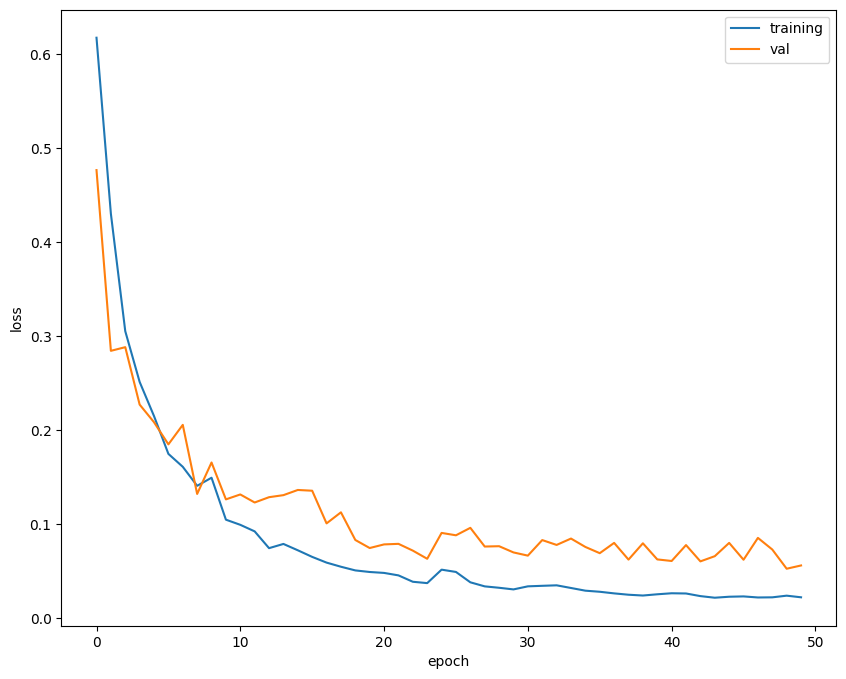

In [35]:
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

In [36]:
history.history["val_accuracy"]

[0.9242424368858337,
 0.9090909361839294,
 0.9090909361839294,
 0.9090909361839294,
 0.9090909361839294,
 0.9090909361839294,
 0.9090909361839294,
 0.939393937587738,
 0.939393937587738,
 0.9545454382896423,
 0.939393937587738,
 0.939393937587738,
 0.939393937587738,
 0.9545454382896423,
 0.9545454382896423,
 0.9545454382896423,
 0.9545454382896423,
 0.9545454382896423,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9545454382896423,
 0.9545454382896423,
 0.9696969985961914,
 0.9696969985961914,
 0.9545454382896423,
 0.9696969985961914,
 0.9545454382896423,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9848484992980957,
 0.9696969985961914,
 0.9848484992980957,
 0.969696998596191

In [37]:
pos[0]

array([30, 25, 51])

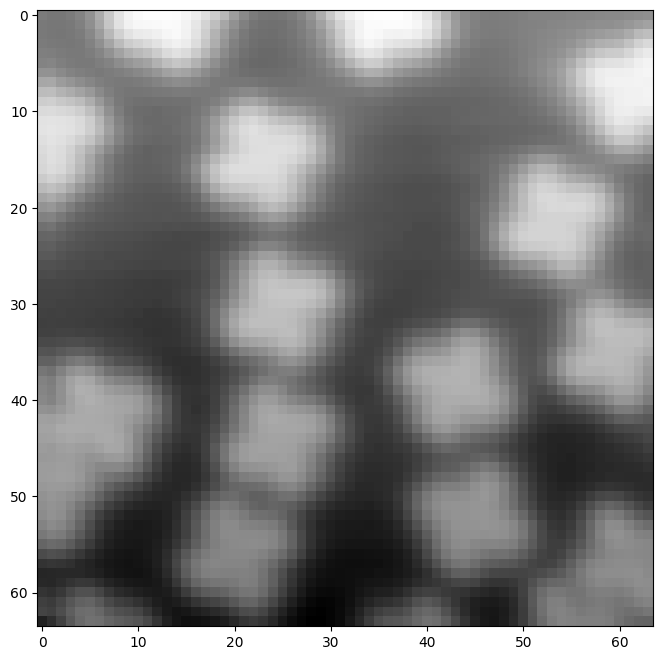

In [38]:
plt.imshow(norm[51])

In [39]:
img = norm[51].copy() # creo una copia della immagine in norm[51]

In [41]:
nrow, ncol = img.shape # prendo righe e colonne dell'immagine
stamps = np.zeros(((nrow - wid * 2) * (ncol - wid * 2), 2 * wid, 2 * wid))
stamps.shape

(1936, 20, 20)

In [44]:
kk = 0 
for ii in range(wid, nrow - wid): # loop nelle righe
  for jj in range(wid, ncol - wid):
    stamps[kk] = img[ii-wid:ii+wid, jj-wid:jj+wid]
    kk += 1

feat_stmp = np.expand_dims(stamps, axis = 3)

In [45]:
# ora posso fare la predizione sui miei dati

pred = model.predict(feat_stmp)

61/61 [==============================] - 0s 2ms/step


In [46]:
pred.shape

(1936, 2)

In [47]:
pred

array([[1.0000000e+00, 1.3498666e-17],
       [1.0000000e+00, 5.1689400e-19],
       [1.0000000e+00, 7.4034267e-20],
       ...,
       [1.0000000e+00, 2.8581219e-12],
       [1.0000000e+00, 1.0200599e-11],
       [1.0000000e+00, 2.1747076e-10]], dtype=float32)

In [48]:
pimg = np.zeros(img.shape) #prediction image
pimg[wid:nrow-wid, wid:ncol-wid] = pred[:, 1].reshape(nrow - 2 * wid, ncol - 2*wid)

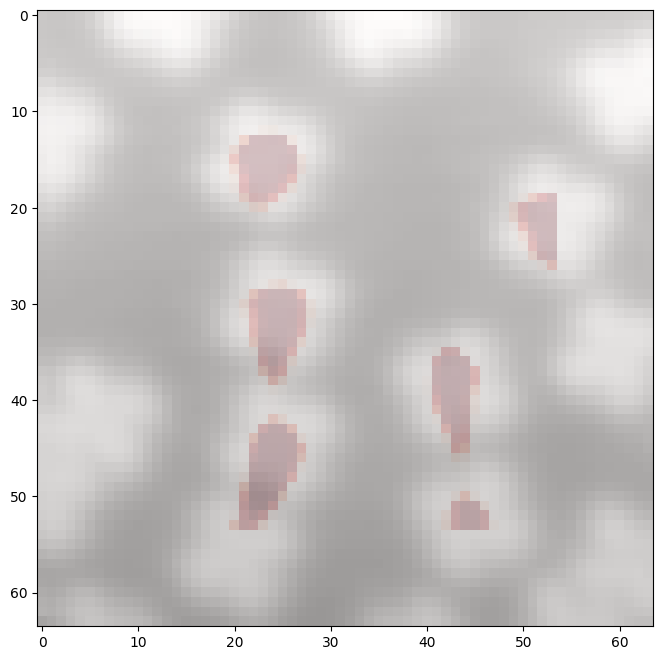

In [52]:
plt.imshow(img, alpha = 0.5)
plt.imshow(pimg, cmap = "Reds", alpha = 0.2)